# Проверка знаний

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст

- sex — пол (1 - мужчина, 0 - женщина)

- cp — тип боли в груди (4 значения)

- trestbps — артериальное давление в покое

- chol — холестерин сыворотки в мг/дл

- fbs — уровень сахара в крови натощак > 120 мг/дл

- restecg — результаты электрокардиографии в покое (значения 0,1,2)

- thalach — достигнута максимальная частота сердечных сокращений

- exang — стенокардия, вызванная физической нагрузкой

- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

- slope — наклон пикового сегмента ST при нагрузке

- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [94]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
import statistics
heart_data = pd.read_csv('data/heart.csv', sep=',')
heart_data['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

### Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [95]:
heart_data['old'] = heart_data['age'].apply(lambda x: 1 if x > 60 else 0)
heart_data['old'].sum()

np.int64(79)

### Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

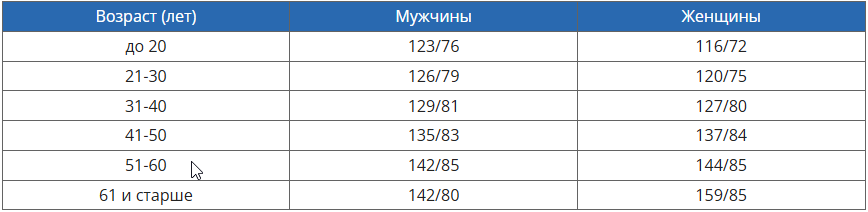

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [96]:
def trestbps_mean(age, sex):
    if age < 21 and sex == 1:
        return 123
    elif age <= 21 and sex == 0:
        return 116
    elif 21<= age < 31 and sex == 1:
        return 126
    elif 21<= age < 31 and sex == 0:
        return 120
    elif 31 <= age < 41 and sex == 1:
        return 129
    elif 31 <= age < 41 and sex == 0:
        return 127
    elif 41 <= age < 51 and sex == 1:
        return 135
    elif 41 <= age < 51 and sex == 0:
        return 137
    elif 51 <= age < 61 and sex == 1:
        return 142
    elif 51 <= age < 61 and sex == 0:
        return 144
    elif 61 <= age and sex == 1:
        return 142
    elif 61 <= age and sex == 0:
        return 159
heart_data['trestbps_mean'] = heart_data.apply(lambda x: trestbps_mean(x['age'], x['sex']), axis = 1)
display(heart_data.loc[300])

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

### Задание 8.3

Проанализируйте датасет и выберите категориальные признаки.

In [97]:
display(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


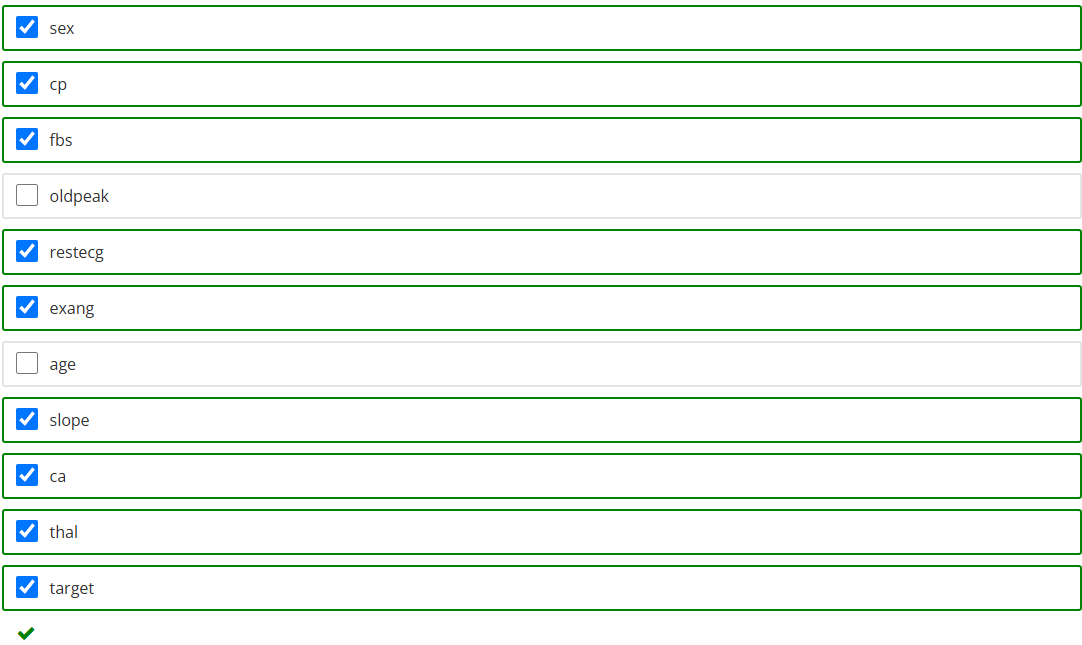

# Задание 8.4

Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

Учтите, что дополнительные методы кодирования требуются только для категориальных признаков с более чем двумя категориями. Бинарные признаки (принимающие два значения, такие как 0 и 1) не нуждаются в дополнительном кодировании.

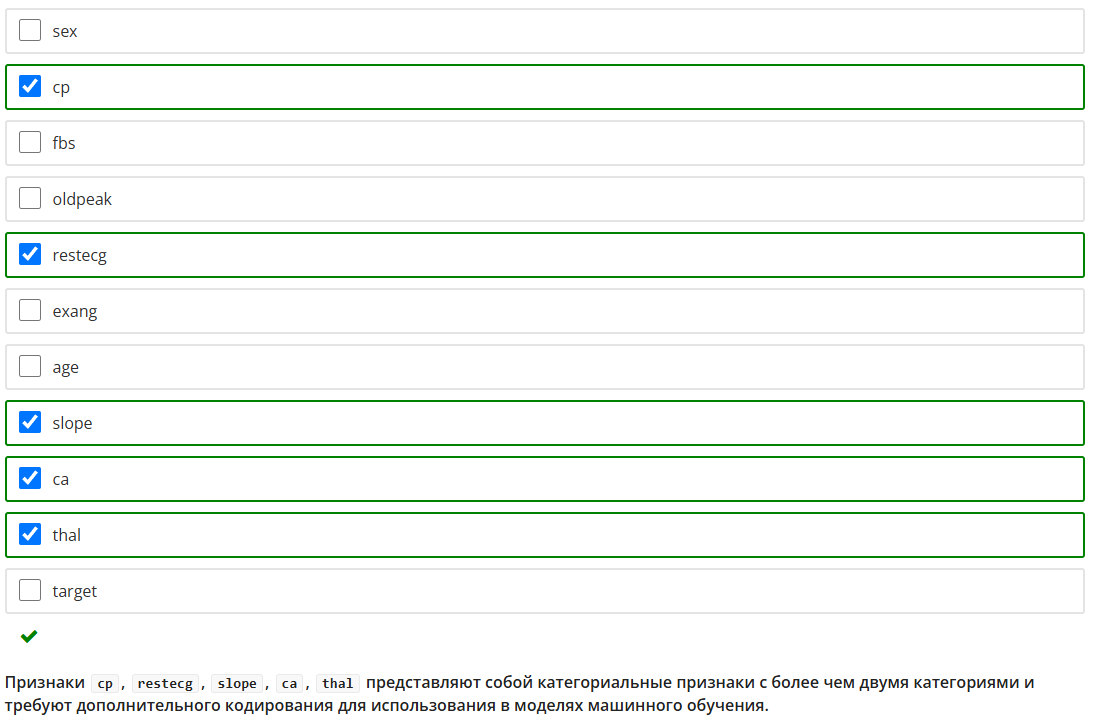

### Задание 8.5

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [98]:
heart_data_clear = heart_data.copy()
encoder_cp = ce.OneHotEncoder(cols=['cp'])
type_bin_cp = encoder_cp.fit_transform(heart_data_clear['cp'])
encoder_restecg = ce.OneHotEncoder(cols=['restecg'])
type_bin_restecg = encoder_restecg.fit_transform(heart_data_clear['restecg'])
encoder_ca = ce.OneHotEncoder(cols=['ca'])
type_bin_ca = encoder_ca.fit_transform(heart_data_clear['ca'])
encoder_thal = ce.OneHotEncoder(cols=['thal'])
type_bin_thal = encoder_thal.fit_transform(heart_data_clear['thal'])
encoder_slope = ce.OneHotEncoder(cols=['slope'])
type_bin_slope = encoder_slope.fit_transform(heart_data_clear['slope'])


In [99]:
heart_data_clear = heart_data.copy()

encoder_cp = ce.OneHotEncoder(cols=['cp'])
type_bin_cp = encoder_cp.fit_transform(heart_data_clear['cp'])

encoder_restecg = ce.OneHotEncoder(cols=['restecg'])
type_bin_restecg = encoder_restecg.fit_transform(heart_data_clear['restecg'])

encoder_slope = ce.OneHotEncoder(cols=['slope'])
type_bin_slope = encoder_slope.fit_transform(heart_data_clear['slope'])

encoder_ca = ce.OneHotEncoder(cols=['ca'])
type_bin_ca = encoder_ca.fit_transform(heart_data_clear['ca'])

encoder_thal = ce.OneHotEncoder(cols=['thal'])
type_bin_thal = encoder_thal.fit_transform(heart_data_clear['thal'])

heart_data_clear = pd.concat([heart_data_clear, type_bin_cp, type_bin_restecg, type_bin_slope, type_bin_ca, type_bin_thal], axis=1)

heart_data_clear = heart_data_clear.drop(['cp','restecg','slope', 'ca', 'thal'], axis = 1)
heart_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

### Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np 

In [101]:
heart_data_clear

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


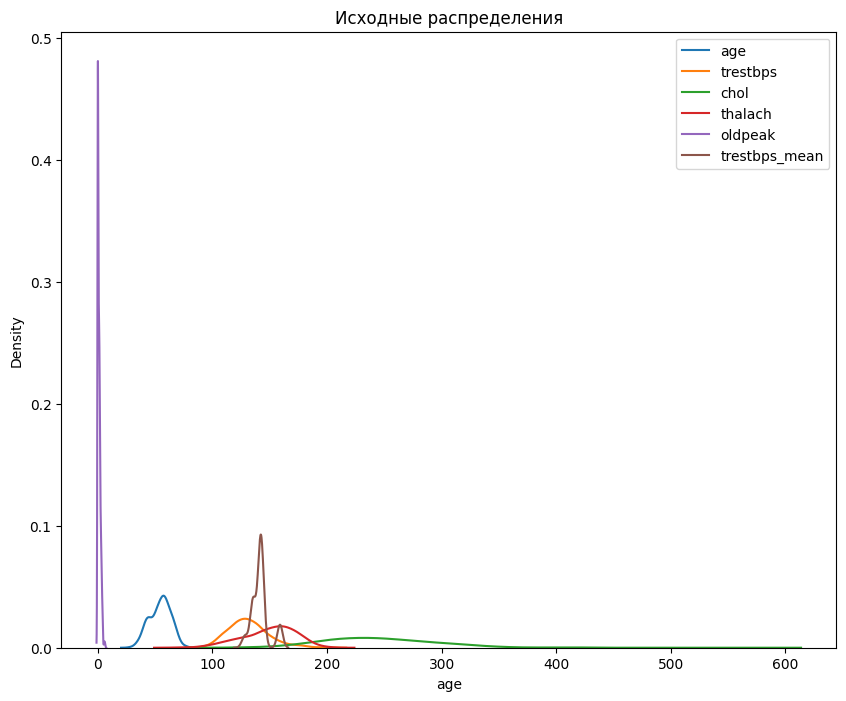

In [102]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
sns.kdeplot(heart_data_clear['age'], ax=ax1, label ='age')
sns.kdeplot(heart_data_clear['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_data_clear['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_data_clear['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_data_clear['oldpeak'], ax=ax1, label ='oldpeak')
sns.kdeplot(heart_data_clear['trestbps_mean'], ax=ax1, label ='trestbps_mean')
plt.legend()

#признаки c выбросами, поэтому RobustScaler

In [103]:
heart_data_normal = heart_data_clear.copy()
mask = heart_data_normal[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']]
mask.describe()



,age,trestbps,chol,thalach,oldpeak,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,141.669967
std,9.082101,17.538143,51.830751,22.905161,1.161075,7.437821
min,29.000000,94.000000,126.000000,71.000000,0.000000,126.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,137.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,142.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,142.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,159.000000


In [104]:
r_scaler = preprocessing.RobustScaler()

heart_data_normal = r_scaler.fit_transform(heart_data_normal[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])

heart_data_normal = pd.DataFrame(heart_data_normal, columns=[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])

heart_data_normal.describe()

,age,trestbps,chol,thalach,oldpeak,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752,-0.066007
std,0.672748,0.876907,0.816232,0.704774,0.725672,1.487564
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000,-3.200000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000,0.000000
max,1.629630,3.500000,5.102362,1.507692,3.375000,3.400000


### Задание 8.7

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

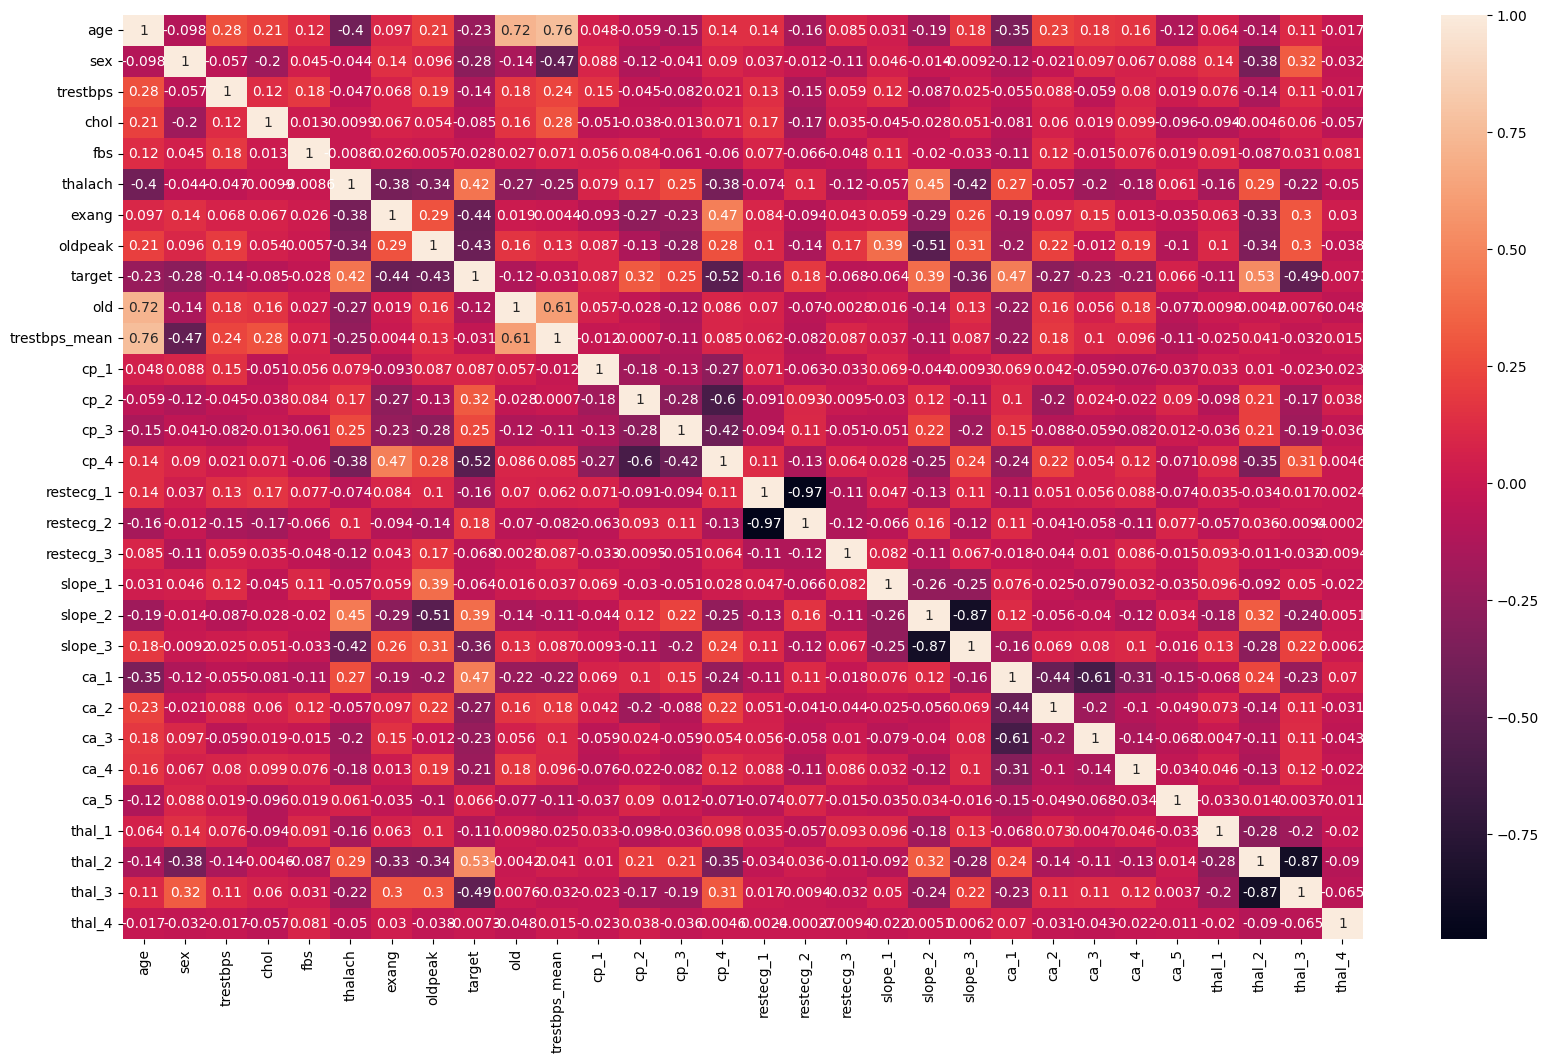

In [105]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 12))
sns.heatmap(heart_data_clear.corr(numeric_only=True), annot=True)

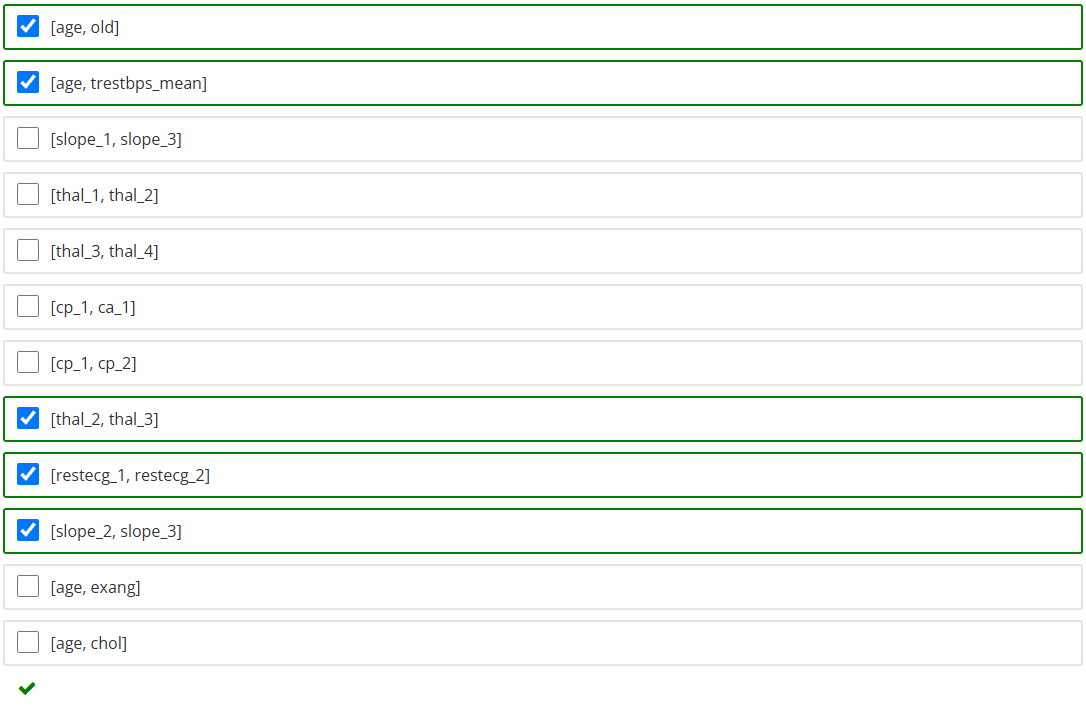